         Unnamed: 0 trans_date_trans_time            cc_num  \
1045211     1045211   2020-03-09 15:09:26      577588686219   
547406       547406   2019-08-22 15:49:01    30376238035123   
110142       110142   2019-03-04 01:34:16  4658490815480264   
1285953     1285953   2020-06-16 20:04:38  3514897282719543   
271705       271705   2019-05-14 05:54:48  6011381817520024   

                                            merchant        category     amt  \
1045211                              fraud_Towne LLC        misc_pos  194.51   
547406                             fraud_Friesen Ltd  health_fitness   52.32   
110142                                fraud_Mohr Inc    shopping_pos    6.53   
1285953                      fraud_Gaylord-Powlowski            home    7.33   
271705   fraud_Christiansen, Goyette and Schamberger   gas_transport   64.29   

           first        last gender                        street  ...  \
1045211    James  Strickland      M            25454 Leonard Lake 

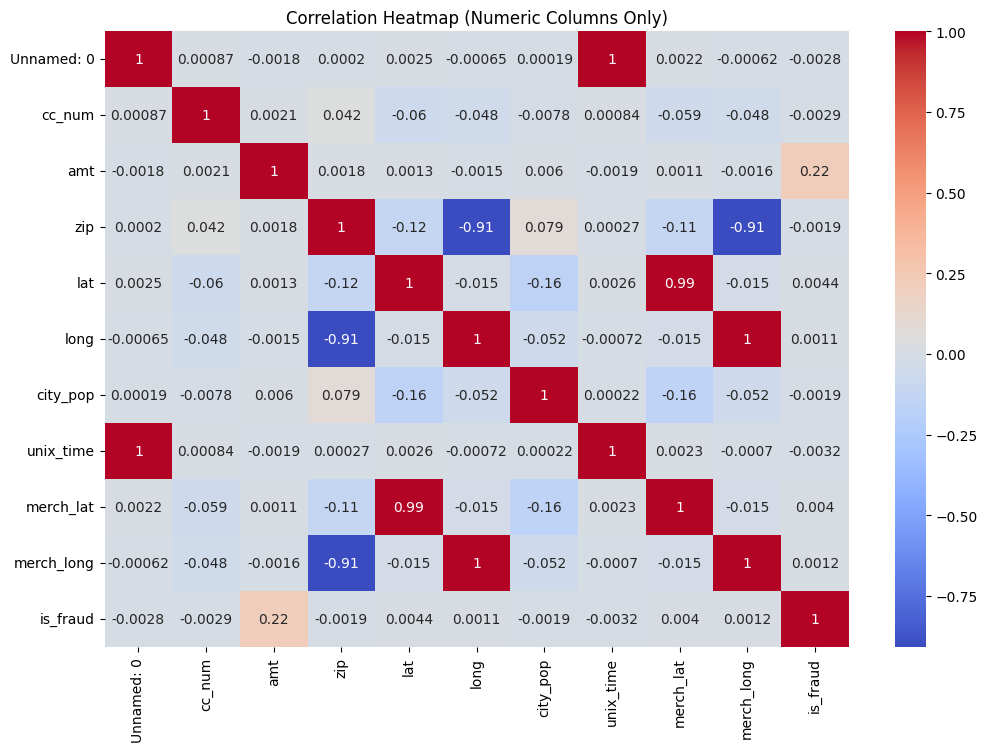

Logistic Regression:
Accuracy: 0.9934319610287785
Confusion Matrix:
 [[77290    54]
 [  457     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     77344
           1       0.00      0.00      0.00       457

    accuracy                           0.99     77801
   macro avg       0.50      0.50      0.50     77801
weighted avg       0.99      0.99      0.99     77801

Decision Tree:
Accuracy: 0.9938175601856017
Confusion Matrix:
 [[77196   148]
 [  333   124]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     77344
           1       0.46      0.27      0.34       457

    accuracy                           0.99     77801
   macro avg       0.73      0.63      0.67     77801
weighted avg       0.99      0.99      0.99     77801

Random Forest:
Accuracy: 0.9947944113828872
Confusion Matrix:
 [[77283    61]
 [  344   113]]
Classifica

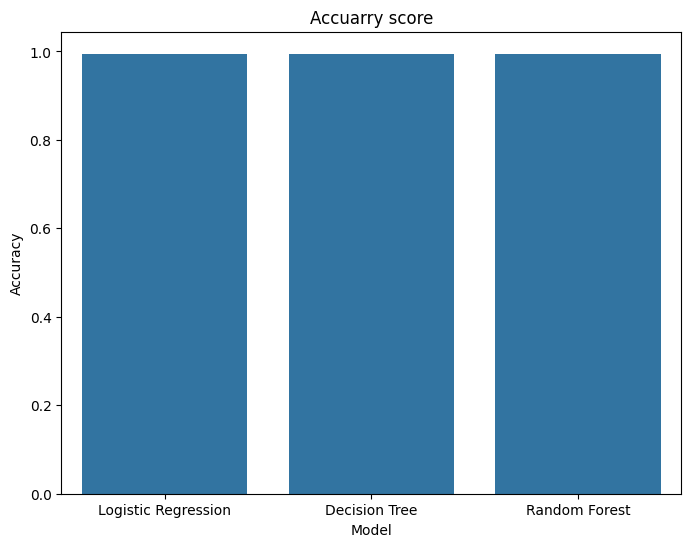

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values

train_data = pd.read_csv('/content/fraudTrain.csv').sample(frac=0.2, random_state=42)
test_data = pd.read_csv('/content/fraudTest.csv')
print(train_data.head())
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,8))
sns.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()
X = train_data.drop(columns=['is_fraud', 'trans_num', 'dob', 'merchant', 'category', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_date_trans_time'])
y = train_data['is_fraud']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train = imputer.fit_transform(X_train)

# Transform the testing data using the trained imputer
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=10)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
forest_clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

# Model Evaluation: Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Model Evaluation: Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Model Evaluation: Random Forest
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))

# Compare model performance visually
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_forest)]

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracies)
plt.title("Accuarry score")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()